# Clustering des document en relation avec la décennie XXX 

In [55]:
import collections
import os
import string
import sys

#Imports pour wordcloud/keywords
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

import os
import yake


import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

import nltk

nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\duboi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\duboi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\duboi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [23]:
data_path = "C:/Users/duboi/MA2TAC/tac/data/txt/"

### Choix de la décennie : 1940
### Chargement des textes en relation avec cette décennie

In [24]:
DECADE = '1940'

In [25]:
files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]

In [26]:
# Exemple de fichiers
files[:5]

['KB_JB838_1940-01-04_01-00001.txt',
 'KB_JB838_1940-01-05_01-00009.txt',
 'KB_JB838_1940-01-07_01-00014.txt',
 'KB_JB838_1940-01-10_01-00003.txt',
 'KB_JB838_1940-01-11_01-00004.txt']

In [27]:
texts = [open(data_path + f, "r", encoding="utf-8").read() for f in files]

In [28]:
# Exemple de textes
texts[0][:400]

"54 e ANNEE. — N° 4. Pages - 40 C 1 *® 8 Grand-Duché : 45 centimes. - France : 75 centime». ABONNEMENTS pour la province on Province } s'abonne à là Poste CH' Vüle au $ pour | T , oi , ŒOl# 28>50 BUREAUX ET FILS SPÉCIAUX: — — ■ ; S Un an 170.00 Congo • j Six mol , 85X0 Etranger : Prix euivant conventions VENTE ET ABONNEM. : PLACE DE LOUVAIN. 23 □ SALLE DE DÉPÊCHES : 124. RUE ROYALE BRUXELLES G “ ■“"

### Véctorisation des documents à l'aide de TF-IDF

In [29]:
# Création d'une fonction de pré-traitement
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

In [ ]:
# Instanciation du modèle TF-IDF avec ses arguments
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)

In [31]:
tfidf_vectors = vectorizer.fit_transform(texts)

c:\Users\duboi\MA2TAC\tac\tac_venv\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [32]:
# Détail de la matrice
tfidf_vectors

<1000x4624 sparse matrix of type '<class 'numpy.float64'>'
	with 937940 stored elements in Compressed Sparse Row format>

In [33]:
pd.Series(
    tfidf_vectors[0].toarray()[0],
    index=vectorizer.get_feature_names_out()
    ).sort_values(ascending=False)

gouvernement    0.158569
milieux         0.154846
cabinet         0.133397
neige           0.118083
politiques      0.117647
                  ...   
dépôts          0.000000
désigné         0.000000
désir           0.000000
désirent        0.000000
♦               0.000000
Length: 4624, dtype: float64

### Application d'un algorithme de clustering sur les vecteurs TF-IDF des documents

In [77]:
# Définir le nombre de clusters
N_CLUSTERS = 3

In [78]:
km_model = KMeans(n_clusters=N_CLUSTERS)

In [79]:
# Application de clusters
clusters = km_model.fit_predict(tfidf_vectors)

clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

pprint(dict(clustering))

{0: ['KB_JB838_1940-01-07_01-00014.txt',
     'KB_JB838_1940-01-19_01-00005.txt',
     'KB_JB838_1940-02-01_01-00006.txt',
     'KB_JB838_1940-02-06_01-00005.txt',
     'KB_JB838_1940-02-07_01-00005.txt',
     'KB_JB838_1940-02-09_01-00005.txt',
     'KB_JB838_1940-02-12_01-00005.txt',
     'KB_JB838_1940-02-20_01-00007.txt',
     'KB_JB838_1940-03-02_01-00007.txt',
     'KB_JB838_1940-03-04_01-00005.txt',
     'KB_JB838_1940-03-10_01-00008.txt',
     'KB_JB838_1940-03-10_01-00010.txt',
     'KB_JB838_1940-04-03_01-00007.txt',
     'KB_JB838_1940-04-07_01-00008.txt',
     'KB_JB838_1940-04-16_01-00008.txt',
     'KB_JB838_1940-04-22_01-00005.txt',
     'KB_JB838_1940-06-30_01-00005.txt',
     'KB_JB838_1940-07-21_01-00005.txt',
     'KB_JB838_1940-07-22_01-00006.txt',
     'KB_JB838_1940-07-24_01-00005.txt',
     'KB_JB838_1940-07-31_01-00005.txt',
     'KB_JB838_1940-08-02_01-00004.txt',
     'KB_JB838_1940-08-25_01-00005.txt',
     'KB_JB838_1940-10-08_01-00005.txt',
     'KB_JB838_1

### Visualisation de Clusters

In [80]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

reduced_vectors[:10]

array([[-0.25310492, -0.13882263],
       [ 0.54050035, -0.16163365],
       [ 0.10133723,  0.00777262],
       [-0.30689786, -0.25600629],
       [-0.26425186, -0.11761542],
       [-0.16141644,  0.20790324],
       [-0.29242089, -0.18337613],
       [-0.24032763, -0.12098364],
       [-0.08008111,  0.16191616],
       [ 0.36157402, -0.0704015 ]])

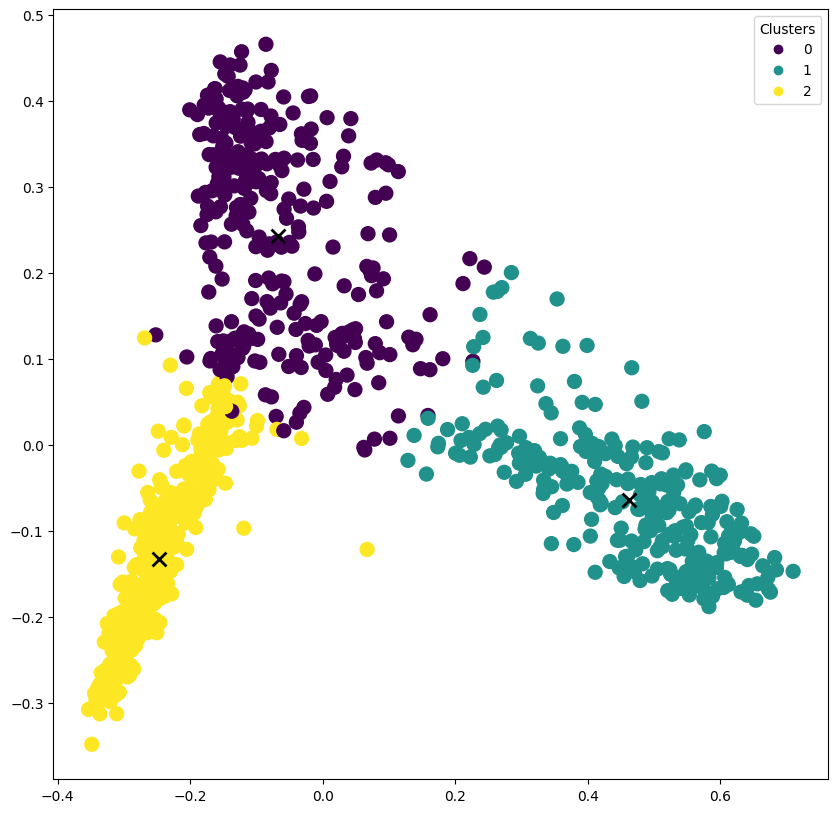

In [81]:
# Génération de plot
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\duboi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


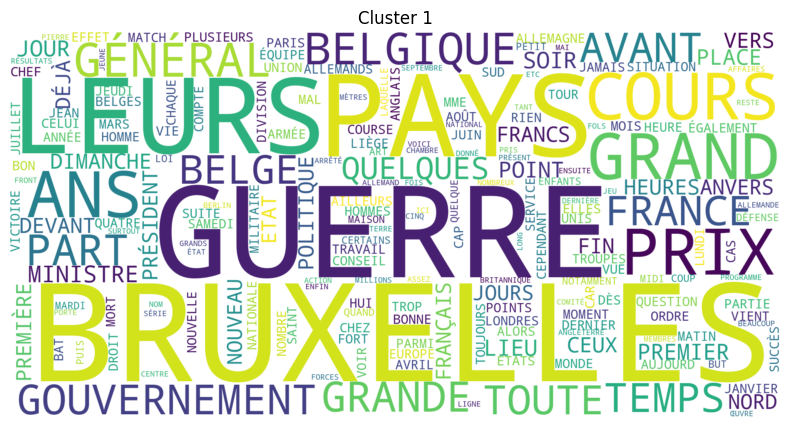

Nuage de mots sauvegardé dans C:/Users/duboi/MA2TAC/tac/data/tmp\cluster_1.png


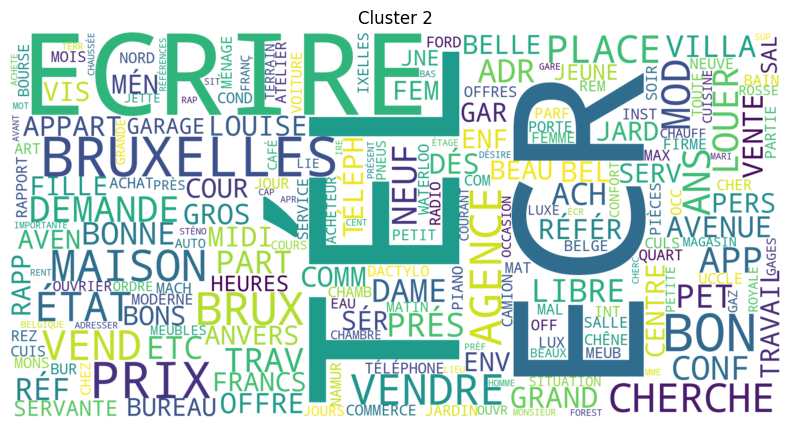

Nuage de mots sauvegardé dans C:/Users/duboi/MA2TAC/tac/data/tmp\cluster_2.png


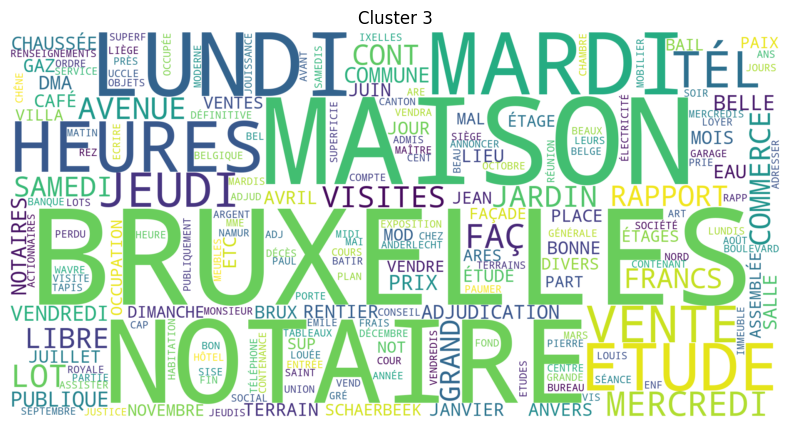

Nuage de mots sauvegardé dans C:/Users/duboi/MA2TAC/tac/data/tmp\cluster_3.png


In [76]:
import os
import collections
import nltk
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Télécharger les stopwords français
nltk.download('stopwords')

# Charger les stopwords français
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem", "très", "peu", "rue"]
sw = set(sw)

# Dossier contenant les fichiers
data_path = "C:/Users/duboi/MA2TAC/tac/data/txt"
DECADE = '1940'

# Lister les fichiers de la décennie
files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]
texts = [open(os.path.join(data_path, f), "r", encoding="utf-8").read() for f in files]

# Fonction de nettoyage de texte
def clean_text(text):
    """Nettoyer un texte en supprimant les stopwords, mots courts et autres éléments inutiles."""
    words = nltk.wordpunct_tokenize(text.lower())
    cleaned = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w not in sw]
    return " ".join(cleaned)

# Nettoyer les textes
cleaned_texts = [clean_text(text) for text in texts]

# Regrouper les textes par cluster
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Vectorisation TF-IDF
vectorizer = TfidfVectorizer(max_df=0.5, min_df=0.1)
tfidf_vectors = vectorizer.fit_transform(cleaned_texts)

# KMeans clustering
N_CLUSTERS = 3
km_model = KMeans(n_clusters=N_CLUSTERS, random_state=42)
clusters = km_model.fit_predict(tfidf_vectors)

# Regrouper les textes par cluster
clustering = collections.defaultdict(list)
for idx, label in enumerate(clusters):
    clustering[label].append(cleaned_texts[idx])

# Générer un nuage de mots pour chaque cluster
output_path = "C:/Users/duboi/MA2TAC/tac/data/tmp"
if not os.path.exists(output_path):
    os.makedirs(output_path)

for cluster_idx, texts in clustering.items():
    cluster_text = " ".join(texts)  # Concaténer les textes d'un cluster
    word_freq = Counter(cluster_text.split())  # Fréquence des mots
    
    # Générer le nuage de mots
    cloud = WordCloud(
        width=2000,
        height=1000,
        background_color='white'
    ).generate_from_frequencies(word_freq)
    
    # Sauvegarder le nuage de mots
    output_file = os.path.join(output_path, f"cluster_{cluster_idx + 1}.png")
    cloud.to_file(output_file)
    
    # Afficher le nuage de mots
    plt.figure(figsize=(10, 5))
    plt.imshow(cloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Cluster {cluster_idx + 1}")
    plt.show()
    print(f"Nuage de mots sauvegardé dans {output_file}")


# Modèle word2vec